In [ ]:
#reference project: https://towardsdatascience.com/social-media-sentiment-analysis-49b395771197

# Version-check --Git Test

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

In [ ]:
from platfrom import python_version
print(python_version)

In [ ]:
import sys
sys.executable

# imports

In [ ]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

# Train file import

In [ ]:
train = pd.read_csv('https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv')

train_copy = train.copy()

In [ ]:
train.tail()

# Test file import

In [ ]:
test = pd.read_csv('https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/test.csv')

test_copy = test.copy()

In [ ]:
print("Train : ", train.shape )
print("Test : ", len(test))

# Data pre-processing

In [ ]:
#Combining Data

In [ ]:
combine = train.append(test, ignore_index = True, sort=True)

In [ ]:
#Removing twitter handles, i.e. (@user)

In [ ]:
def remove_pattern(text, pattern):
    
    # re.findall() finds the pattern i.e @user and puts it in a list for further task
    r = re.findall(pattern, text)
    
    # re.sub() removes @user from the sentences in the dataset
    for i in r:
        text = re.sub(i,"",text)
        
    return text

In [ ]:
#Vectorizing instead of for loop

In [ ]:
combine['Tidy_tweets'] = np.vectorize(remove_pattern)(combine['tweet'], "@[\w]*")

In [ ]:
combine.head()

In [ ]:
#Removing puntuation, numbers and special characters

In [ ]:
combine['Tidy_tweets'] = combine['Tidy_tweets'].str.replace("[^a-zA-Z#]", " ")

In [ ]:
combine.tail()

In [ ]:
#Removing Short words

In [ ]:
combine['Tidy_tweets'] = combine['Tidy_tweets'].apply(lambda x: ' '.join([w for w in x.split() if len(w) >3 ]))

In [ ]:
combine.head()

In [ ]:
#Tokenization

In [ ]:
tokenized_tweet = combine['Tidy_tweets'].apply(lambda x: x.split())

tokenized_tweet.head()

In [ ]:
tokenized_tweet

In [ ]:
len(tokenized_tweet)

In [ ]:
#Stemming

In [ ]:
from nltk import PorterStemmer

ps = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [ps.stem(i) for i in x])

In [ ]:
tokenized_tweet.head()

In [ ]:
#Joining everything back

In [ ]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

combine['Tidy_tweets'] = tokenized_tweet

In [ ]:
combine

In [ ]:
###----------###

# Data Visualization

In [ ]:
#word cloud tool 

In [ ]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import urllib
import requests

In [ ]:
#Wordcloud generation for label 0

In [ ]:
#storing all label 0 tweets in one variable

all_words_positive = ' '.join(text for text in combine['Tidy_tweets'][combine['label']==0])

In [ ]:
len(all_words_positive)

In [ ]:
#generating wordcloud

In [ ]:
#combining the image with dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

#Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_positive)

In [ ]:
# Size of the image generated 
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")

plt.axis('off')
plt.show()

In [ ]:
#Wordcloud generation for label 1

In [ ]:
#storing all label 1 tweets in one variable


all_words_negative = ' '.join(text for text in combine['Tidy_tweets'][combine['label']==1])

In [ ]:
# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_negative)


In [ ]:
# Size of the image generated 
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func=image_colors),interpolation="gaussian")

plt.axis('off')
plt.show()

## Extracting hashtags

In [ ]:
#function to extract hashtags

def Hashtag_Extract(x):
    hashtag = []
    
    #looping over the words in the tweet
    for i in x:
        ht = re.findall(r'#(\w+)', i)
        hashtag.append(ht)
        
    return hashtag

In [ ]:
#nesting all hashtags from the positive reviews dataset

ht_positive = Hashtag_Extract(combine['Tidy_tweets'][combine['label']==0])

ht_positive

In [ ]:
#unnest the list

ht_positive_unnest = sum(ht_positive, [])

In [ ]:
ht_positive_unnest

In [ ]:
#negative list of all hashtags

In [ ]:
ht_negative = Hashtag_Extract(combine['Tidy_tweets'][combine['label']==1])

ht_negative

In [ ]:
ht_negative_unnest = sum(ht_negative, [])

In [ ]:
ht_negative_unnest

### Counting frequency of the words

In [ ]:
word_freq_positive = nltk.FreqDist(ht_positive_unnest)
word_freq_positive

In [ ]:
#Creating datafram for the most frequently used words in hashtags

df_positive = pd.DataFrame({'Hashtags':list(word_freq_positive.keys()), 'Count':list(word_freq_positive.values())})

df_positive

In [ ]:
#Plotting the barplot for the 20 most frequent words used for hashtags

df_positive_plots = df_positive.nlargest(20, columns='Count')

sns.barplot(data=df_positive_plots, y='Hashtags', x='Count')
sns.despine()

In [ ]:
#For negative tweets

word_freq_negative = nltk.FreqDist(ht_negative_unnest)

word_freq_negative

In [ ]:
#Creating a dataframe for the most frequently used words in hashtags

df_negative = pd.DataFrame({'Hashtags':list(word_freq_negative.keys()), 'Count':list(word_freq_negative.values())})

df_negative

In [ ]:
#Plotting the barplot for the 20 most frequent words used for hashtags

df_negative_plots = df_negative.nlargest(20, columns='Count')

sns.barplot(data=df_negative_plots, y='Hashtags', x='Count')
sns.despine()

# Extracting features from cleaned tweets

## Using Bag-of-word technique

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

#bag of words feature matrix
bow = bow_vectorizer.fit_transform(combine['Tidy_tweets'])

df_bow = pd.DataFrame(bow.todense())

df_bow




## Using TF-IDF feature extraction method

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_df=0.90, min_df= 2, max_features=1000, stop_words='english')

tfidf_matrix = tfidf.fit_transform(combine['Tidy_tweets'])

df_tfidf = pd.DataFrame(tfidf_matrix.todense())

df_tfidf


# Splitting dataset into training and validation

In [ ]:
# using features from bag-of-words for training

train_bow = bow[:31962]

train_bow.todense()

In [ ]:
# using features from tf-idf for training

train_tfidf_matrix = tfidf_matrix[:31962]

train_tfidf_matrix.todense()

In [ ]:
#splitting dataset into training and validation

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#bag-of-words feature
x_train_bow, x_valid_bow, y_train_bow, y_valid_bow = train_test_split(train_bow, train['label'], test_size=0.3, random_state=2)

In [ ]:
x_train_tfidf, x_valid_tfidf, y_train_tfidf, y_valid_tfidf = train_test_split(train_tfidf_matrix,train['label'],test_size=0.3,random_state=17)

# Machine learning 

In [ ]:
#To check the model performance we will use F1-score

In [ ]:
#we will build 3 models
# 1. Logistic Regression
# 2. XGBoost
# 3. Decision Tree

#And see which is the best

In [73]:
from sklearn.metrics import f1_score

## Logistic Regression

In [75]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=0, solver='lbfgs')

In [77]:
#For Bag-of-words features

#fitting the model
LogReg.fit(x_train_bow, y_train_bow)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [78]:
#predicting 
prediction_bow = LogReg.predict_proba(x_valid_bow)
prediction_bow

array([[9.86501156e-01, 1.34988440e-02],
       [9.99599096e-01, 4.00904144e-04],
       [9.13577383e-01, 8.64226167e-02],
       ...,
       [8.95457155e-01, 1.04542845e-01],
       [9.59736065e-01, 4.02639345e-02],
       [9.67541420e-01, 3.24585797e-02]])

In [79]:
#Calculating F1-score

#if prediction >=0.3 then 1 else 0
# 0-postive tweets, and 1-negative tweets

prediction_int = prediction_bow[:,1] >= 0.3

#converting the results into integer types
prediction_int = prediction_int.astype(np.int)
prediction_int

#Calculating f1 score
log_bow = f1_score(y_valid_bow, prediction_int)


In [91]:
log_bow

0.5721352019785655

In [88]:
#for tfidf features

LogReg.fit(x_train_tfidf,y_train_tfidf)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [89]:
prediction_tfidf = LogReg.predict_proba(x_valid_tfidf)

prediction_tfidf


array([[0.98487907, 0.01512093],
       [0.97949889, 0.02050111],
       [0.9419737 , 0.0580263 ],
       ...,
       [0.98630906, 0.01369094],
       [0.96746188, 0.03253812],
       [0.99055287, 0.00944713]])

In [90]:
# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
prediction_int = prediction_tfidf[:,1]>=0.3

prediction_int = prediction_int.astype(np.int)
prediction_int

# calculating f1 score
log_tfidf = f1_score(y_valid_tfidf, prediction_int)

log_tfidf

0.5862068965517241

## XGBoost

In [94]:
from xgboost import XGBClassifier

In [95]:
#bag-of-words
model_bow = XGBClassifier(random_state=22,learning_rate=0.9)

In [96]:
#model fitting
model_bow.fit(x_train_bow, y_train_bow)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.9, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=22, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [97]:
#predicting probabilities
xgb = model_bow.predict_proba(x_valid_bow)
xgb

array([[9.9109417e-01, 8.9058345e-03],
       [9.9910688e-01, 8.9310389e-04],
       [9.2758572e-01, 7.2414286e-02],
       ...,
       [8.9067906e-01, 1.0932093e-01],
       [9.2758572e-01, 7.2414286e-02],
       [9.2758572e-01, 7.2414286e-02]], dtype=float32)

In [98]:
#calculating F1 score

# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets

xgb = xgb[:,1] >= 0.3

#converting result to integer type
xgb_int = xgb.astype(np.int)

#calculating F1 score
xgb_bow = f1_score(y_valid_bow, xgb_int)

xgb_bow

0.5811023622047244

In [ ]:
#For TF-IDF

In [99]:
model_tfidf = XGBClassifier(random_state=29, learning_rate=0.7)

In [100]:
#model fitting
model_tfidf.fit(x_train_tfidf, y_train_tfidf)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.7, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=29, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [101]:
#predicting probabilites
xgb_tfidf = model_tfidf.predict_proba(x_valid_tfidf)

xgb_tfidf

array([[0.9958908 , 0.00410918],
       [0.9872918 , 0.01270822],
       [0.9527768 , 0.04722321],
       ...,
       [0.99192214, 0.00807783],
       [0.9852176 , 0.01478244],
       [0.9974108 , 0.0025892 ]], dtype=float32)

In [102]:
#Calculating F1 score

# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
xgb_tfidf = xgb_tfidf[:,1] >= 0.3

#converting results into integer
xgb_tfidf_int = xgb_tfidf.astype(np.int)

#calculating f1 score
xgb_tfidf_score = f1_score(y_valid_tfidf, xgb_tfidf_int)

xgb_tfidf_score

0.5792

## Decision tree

In [103]:
from sklearn.tree import DecisionTreeClassifier

dct = DecisionTreeClassifier(criterion='entropy', random_state=1)

In [ ]:
#for bag-of-words

In [104]:
#fitting the model
dct.fit(x_train_bow, y_train_bow)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [105]:
#predicting probabilities

dct_bow = dct.predict_proba(x_valid_bow)
dct_bow

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [106]:
#Calulcating F1 Score

# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
dct_bow = dct_bow[:,1] >= 0.3

#Converting result to integer
dct_bow_int = dct_bow.astype(np.int)

#Calculating f1 score
dct_bow_score = f1_score(y_valid_bow, dct_bow_int)
dct_bow_score

0.5141776937618148

In [ ]:
#for tf-idf

In [107]:
#Fitting the model

dct.fit(x_train_tfidf, y_train_tfidf)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [111]:
#predicting probabilities

dct_tfidf = dct.predict_proba(x_valid_tfidf)

dct_tfidf

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [112]:
#Calculating F1 Score

# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
dct_tfidf = dct_tfidf[:,1] >= 0.3

# converting the results to integer type
dct_tfidf_int = dct_tfidf.astype(np.int)

# calculating f1 score
dct_tfidf_score = f1_score(y_valid_tfidf, dct_tfidf_int)

dct_tfidf_score

0.5498821681068342

# Model comparison

### For Bag-of-words 

In [114]:
Algo_1 = ['Logistic Regression(Bag-of-words)', 'XGBoost(Bag-of-words)', 'DecisionTree(Bag-of-words)']
score_1 = [log_bow, xgb_bow, dct_bow_score]
compare_1 = pd.DataFrame({'Model': Algo_1, 'F1_Score': score_1}, index=[i for i in range(1,4)])

compare_1.T

,1,2,3
Model,Logistic Regression(Bag-of-words),XGBoost(Bag-of-words),DecisionTree(Bag-of-words)
F1_Score,0.572135,0.581102,0.514178


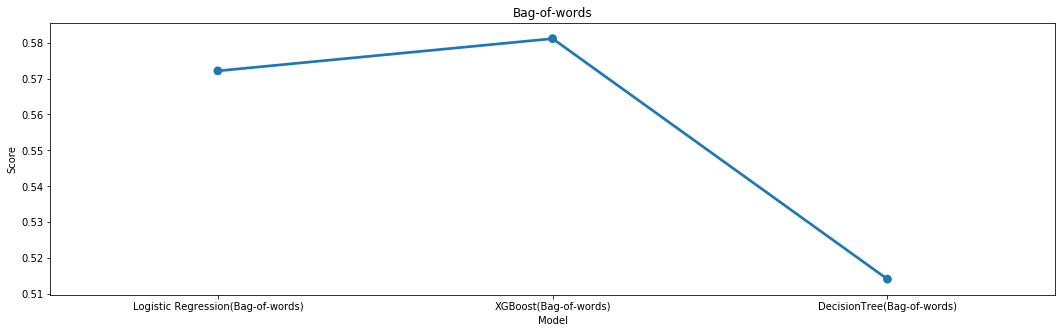

In [116]:
#Comparison graph

plt.figure(figsize=(18,5))

sns.pointplot(x='Model', y='F1_Score', data=compare_1)

plt.title('Bag-of-words')
plt.xlabel('Model')
plt.ylabel('Score')

plt.show()

###  For TF-IDF 

In [118]:
Algo_2 = ['LogisticRegression(TF-IDF)','XGBoost(TF-IDF)','DecisionTree(TF-IDF)']

score_2 = [log_tfidf,xgb_tfidf_score,dct_tfidf_score]

compare_2 = pd.DataFrame({'Model':Algo_2,'F1_Score':score_2},index=[i for i in range(1,4)])

compare_2.T

,1,2,3
Model,LogisticRegression(TF-IDF),XGBoost(TF-IDF),DecisionTree(TF-IDF)
F1_Score,0.586207,0.5792,0.549882


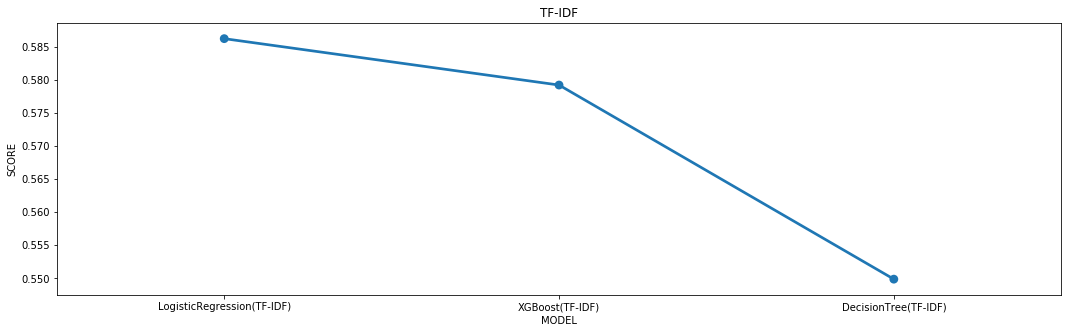

In [119]:
plt.figure(figsize=(18,5))

sns.pointplot(x='Model',y='F1_Score',data=compare_2)

plt.title('TF-IDF')
plt.xlabel('MODEL')
plt.ylabel('SCORE')

plt.show()

In [ ]:
#Therefore Logistic Regression is the best model

In [120]:
#Comparing the feature extraction technique using the best model, i.e. Logistic_regression

Algo_best = ['LogisticRegression(Bag-of-Words)','LogisticRegression(TF-IDF)']

score_best = [log_bow,log_tfidf]

compare_best = pd.DataFrame({'Model':Algo_best,'F1_Score':score_best},index=[i for i in range(1,3)])

compare_best.T

,1,2
Model,LogisticRegression(Bag-of-Words),LogisticRegression(TF-IDF)
F1_Score,0.572135,0.586207


In [ ]:
#Comparision using graph

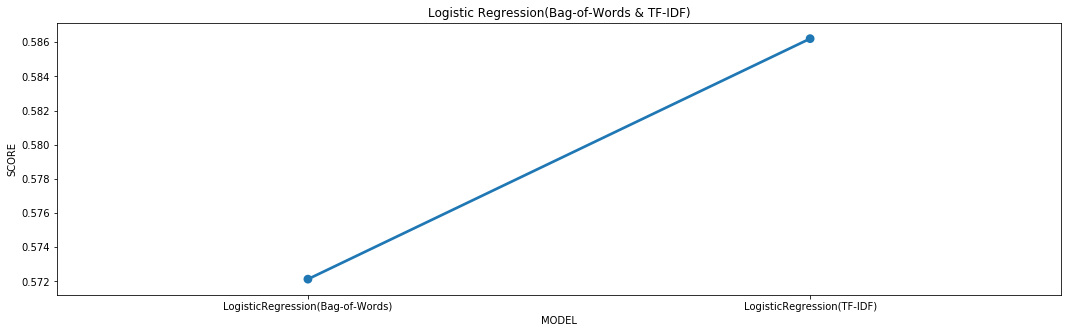

In [121]:
plt.figure(figsize=(18,5))

sns.pointplot(x='Model',y='F1_Score',data=compare_best)

plt.title('Logistic Regression(Bag-of-Words & TF-IDF)')
plt.xlabel('MODEL')
plt.ylabel('SCORE')

plt.show()

In [ ]:
#Therefore feature extractiong using TF-IDF was the best

# Predicting the results for our test data

In [123]:
test_tfidf = tfidf_matrix[31962:]
test_pred = LogReg.predict_proba(test_tfidf)

test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)


test['label'] = test_pred_int

#storing  the result in csv
submission = test[['id','label']]
submission.to_csv('result.csv', index=False)

In [126]:
#reading the data from csv
res = pd.read_csv('result.csv')


In [127]:
res

,id,label
0,31963,0
1,31964,0
2,31965,0
3,31966,0
4,31967,0
...,...,...
17192,49155,1
17193,49156,0
17194,49157,0
17195,49158,0
